## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
master_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Write this out to QA results in Excel
master_merge.to_csv("merge.csv", index=False, header=True)

# Display the data table for preview
master_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = master_merge["Mouse ID"].nunique() 
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = master_merge[master_merge.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
master_merge.drop(master_merge.loc[master_merge['Mouse ID']=="g989"].index, inplace=True)

In [5]:
# Export to see what I've got
master_merge.to_csv("dropdupes.csv", index=False, header=True)


In [6]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = master_merge["Mouse ID"].nunique() 
num_clean_mice

248

In [7]:
# Adding a check to see count of records - should be less than original count (we see it removed all 13 rows for g989)
master_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


# Groupby
regimen_group = master_merge.groupby(['Drug Regimen'])

# Calculate values
regimen_mean = regimen_group["Tumor Volume (mm3)"].mean()
regimen_median = regimen_group["Tumor Volume (mm3)"].median()
regimen_var = regimen_group["Tumor Volume (mm3)"].var()
regimen_stdev = regimen_group["Tumor Volume (mm3)"].std()
regimen_SEM = regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_stats_summary = pd.DataFrame({"Mean":regimen_mean,
                                     "Median": regimen_median,
                                     "Variance": regimen_var,
                                     "Standard Deviation":regimen_stdev,
                                     "SEM":regimen_SEM})

regimen_stats_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_group.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

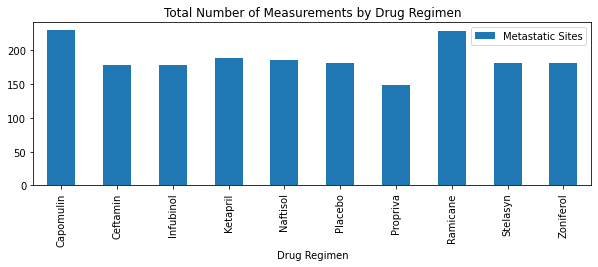

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas. 
# I used Metastatic Sites field but not sure if there was another way?
reg_count_df = regimen_group["Metastatic Sites"].count().to_frame()
# Use DataFrame.plot() in order to create a bar chart of the data
reg_count_df.plot(kind="bar",figsize=(10,3)) #.plot is pandas
plt.title("Total Number of Measurements by Drug Regimen")
plt.show()


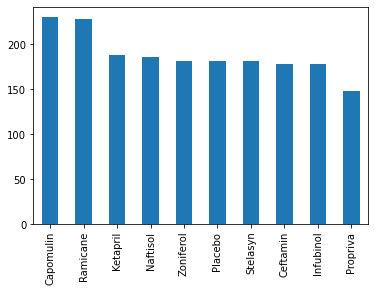

In [26]:
drug = master_merge['Drug Regimen'].value_counts()
drug.plot(kind="bar")
plt.show()

# plt.bar(drug.index.values,drug.values) # values is a call to a series so we call the index values and the data values

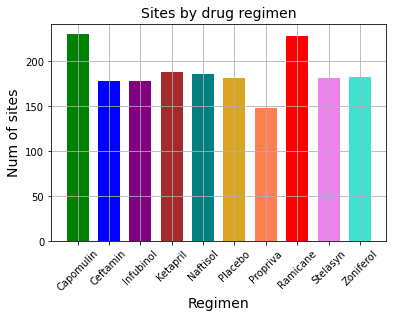

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Unclear to me how we know how many measurements but I am guessing with Mestatic sites.
reg_count_df # This is my df of metastatic sites grouped by drug regimen
clean_df = reg_count_df.reset_index() # reseting the index so the regimen will be a column not the index.
# and so I can set it to a variable and use as the X axis.

y = clean_df['Metastatic Sites']
x = clean_df['Drug Regimen']

New_Colors = ['green','blue','purple','brown','teal', 'goldenrod','coral','red','violet','turquoise']
plt.bar(x, y, width=.7,color=New_Colors)
plt.title('Sites by drug regimen', fontsize=14)
plt.xlabel('Regimen', fontsize=14)
plt.ylabel('Num of sites', fontsize=14)
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Are these values even correct?

# Is this even Pandas??

regimen_group = master_merge.groupby(['Sex']) # grouby sex
sex_count = regimen_group.nunique()
sex_count

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,123,10,24,14,10,800,5
Male,125,10,24,14,10,834,5


<AxesSubplot:ylabel='Mouse ID'>

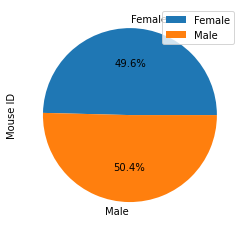

In [29]:
sex_count.plot(kind="pie", y="Mouse ID",autopct='%1.1f%%')

# .count().plot(kind="pie", y="Metastatic Sites",autopct='%1.1f%%')

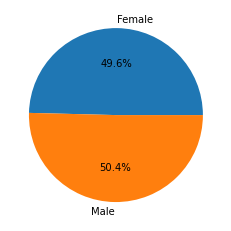

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count["Mouse ID"],labels= sex_count.index.values, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
master_merge.head()

# Start by getting the last (greatest) timepoint for each mouse
Mouse_grp = master_merge.groupby(["Mouse ID"]).max()["Timepoint"] 
Mouse_grp.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Mouse_grp = Mouse_grp.reset_index()
Mouse_grp

new_df = pd.merge(Mouse_grp,master_merge, on= ["Mouse ID", "Timepoint"])
new_df



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [49]:
# Put treatments into a list for for loop (and later for plot labels)

# Capomulin, Ramicane, Infubinol, and Ceftamin
Drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
TumorVol = []

for x in Drug_list:
    drugVol = new_df.loc[new_df["Drug Regimen"]==x]["Tumor Volume (mm3)"]
    TumorVol.append(drugVol)
    #print(x,drugVol)   
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = drugVol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = drugVol.loc[(drugVol<lower_bound)|(drugVol>upper_bound)]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    print(x, outlier)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

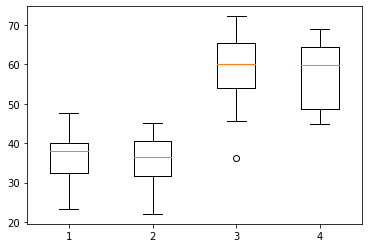

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(TumorVol)
plt.show

## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
